# STINTSY MACHINE PROJECT

## INTRODUCTION

Sleep is an essential aspect of human health, impacting physical, mental, and emotional well-being. As lifestyles grow increasingly demanding, understanding the factors that influence sleep quality has become an integral area of study. This project aims to predict sleep efficiency, a key indicator of overall sleep quality, based on various factors including sleep duration, demographics, and lifestyle choices. Sleep efficiency, defined as the proportion of time spent asleep while in bed, is a key indicator of overall sleep quality.

The dataset chosen for this project is the Sleep Efficiency Dataset from Kaggle, which provides detailed information on the sleep patterns and lifestyle behaviors of a group of individuals. It includes variables such as age, gender, sleep durations, and sleep patterns,  along with the time spent in various sleep stages such as REM, deep sleep, and light sleep. Additionally, it contains controllable lifestyle factors including caffeine and alcohol consumption,  smoking status, and exercise frequency, all of which may play a role in influencing sleep efficiency. The dataset allows for the exploration of relationships impacting sleep quality. 

The target task for this project is a regression problem, intending to predict the continuous variable of sleep efficiency based on the provided features. To accomplish this, three machine learning models will be employed: Linear Regression, K-nearest neighbors, and Random Forest. These models will be analyzed and compared to determine which method best predicts sleep efficiency by capturing both linear and non-linear relationships in the data. Ultimately, this project aims to uncover valuable insights that could lead to personalized interventions to improve sleep quality and overall well-being.


## DESCRIPTION OF THE DATASET

The dataset used for this research, the [Sleep Efficiency Dataset](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency), is sourced from Kaggle.

The dataset contains information about a group of test subjects and their sleep patterns. Each respondent is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.
<br>


**Variable Description** <br>

**Identifier**

1. ID - unique identifier for each participant

**Demographic**

2. Age - age of the respondent
3. Gender - gender of the respondent

**Sleep data**

4. Bedtime - date & time the respondent slept (format in 24-hour format)
5. Wakeup time - date & time the respondent woke up (format in 24-hour format)
6. Sleep duration - total amount of time the respondent slept (in hours)
7. Sleep efficiency - a measure of the proportion of time in bed spent asleep
8. Awakenings - no. of times the respondent wakes up during the night

**Sleep Percentage**

9. REM sleep percent - percentage of total sleep time spent in REM sleep

**What is REM sleep?**

- REM (Rapid Eye Movement) sleep is a phase of the sleep cycle characterized by rapid eye movements, vivid dreaming, muscle paralysis to prevent physical activity during dreams, increased brain activity, and irregular heart rate and breathing. It's one of the two main categories of sleep, alternating with non-REM sleep throughout the night in approximately 90-minute cycles. REM sleep is essential for memory consolidation, emotional processing, and overall cognitive function, contributing to feeling refreshed and alert upon waking. Disruptions in REM sleep can lead to sleep disorders like REM sleep behavior disorder and narcolepsy.

10. Deep sleep percent - percentage of total sleep time spent in deep sleep

**What is deep sleep?**
- Deep sleep, also known as slow-wave sleep (SWS), is the most restorative stage of the sleep cycle, occurring in Stage 3 of non-REM sleep. It features slow brain waves, profound muscle relaxation, limited dreaming, and is challenging to awaken from. Deep sleep is crucial for physical restoration, memory consolidation, immune function, and feeling refreshed upon waking. It's most abundant in the early part of the night and becomes less prevalent as the night progresses.

11. Light sleep percent - percentage of total sleep time spent in light sleep

**What is light sleep?**
- Light sleep, often referred to as Stage 1 and Stage 2 of non-REM (NREM) sleep, is characterized by reduced brain activity and muscle tone compared to wakefulness. During these stages, your body is still relatively responsive to external stimuli, and you can be easily awakened. Light sleep typically occurs at the beginning of the sleep cycle and becomes progressively deeper as you transition into deeper NREM stages and ultimately into REM sleep.

**Controllable values**

12. Caffeine consumption - the amount of caffeine consumed in the 24 hours prior to bedtime (in mg)
13. Alcohol consumption - amount of alcohol consumed in the 24 hours prior to bedtime (in oz)
14. Smoking status - does the respondent smokes or not
15. Excercise Frequency - no. of times the respondent exercises each week

## REQUIREMENTS

The requirement of this project is the Sleep_Efficiency.cvs where the dataset is stored.

### Important Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



## DATA CLEANING AND PREPROCESSING

### Reading the Dataset

In [2]:
slpEf_df = pd.read_csv("Sleep_Efficiency.csv")
slpEf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

All of the columns

In [3]:
print(slpEf_df.columns)

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')


Here are the first five observation in the dataset.

In [4]:
slpEf_df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### Data Cleaning

#### Look For Null Values

In [5]:
slpEf_df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

Printing of Null Values

In [6]:
nullVal = slpEf_df[["Awakenings", "Caffeine consumption", "Alcohol consumption", "Exercise frequency"]].isnull().any(axis=1)
instanceNull = slpEf_df[nullVal]
instanceNull

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,NaN,50.0,0.0,Yes,3.0
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.0,0.83,15,75,10,3.0,0.0,NaN,No,2.0
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.0,0.88,15,75,10,1.0,NaN,5.0,No,2.0
26,27,36,Female,2021-06-18 00:00:00,2021-06-18 07:00:00,7.0,0.95,28,55,17,0.0,NaN,0.0,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,28,Female,2021-08-11 23:00:00,2021-08-11 07:00:00,8.0,0.90,22,63,15,NaN,75.0,2.0,No,4.0
440,441,28,Female,2021-02-06 21:00:00,2021-02-06 05:00:00,8.0,0.88,22,63,15,0.0,75.0,NaN,Yes,2.0
442,443,27,Female,2021-02-06 01:30:00,2021-02-06 08:30:00,7.0,0.68,23,22,55,1.0,NaN,4.0,No,1.0
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,NaN


Replacing Null Values Under Awakenings Column

In [7]:
awakeningsMean = round(slpEf_df['Awakenings'].mean())
print("The mean of the Awakening Column (Rounded To the Nearest Whole Number): " + str(awakeningsMean))
slpEf_df['Awakenings'] = slpEf_df['Awakenings'].fillna(awakeningsMean)

The mean of the Awakening Column (Rounded To the Nearest Whole Number): 2


Replacing Null Values Under Caffeine Consumption Column

In [8]:
cafConsMean = round(slpEf_df['Caffeine consumption'].mean())
print("The mean of the Caffeine Consumption Column (Rounded To the Nearest Whole Number): " + str(cafConsMean))
slpEf_df['Caffeine consumption'] = slpEf_df['Caffeine consumption'].fillna(cafConsMean)

The mean of the Caffeine Consumption Column (Rounded To the Nearest Whole Number): 24


Replacing Null Values Under Alcohol Consumption Column

In [9]:
alcConsMean = round(slpEf_df['Alcohol consumption'].mean())
print("The mean of the Alcohol Consumption Column (Rounded To the Nearest Whole Number): " + str(alcConsMean))
slpEf_df['Alcohol consumption'] = slpEf_df['Alcohol consumption'].fillna(alcConsMean)

The mean of the Alcohol Consumption Column (Rounded To the Nearest Whole Number): 1


Replacing Null Values Under Exercise Frequency Column

In [10]:
exerFreqMean = round(slpEf_df['Exercise frequency'].mean())
print("The mean of the Awakening Colum (Rounded To the Nearest Whole Number): " + str(exerFreqMean))
slpEf_df['Exercise frequency'] = slpEf_df['Exercise frequency'].fillna(exerFreqMean)

The mean of the Awakening Colum (Rounded To the Nearest Whole Number): 2


After Replacement

In [11]:
slpEf_df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [12]:
instanceNullAfter = slpEf_df.loc[instanceNull.index]
instanceNullAfter

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,24.0,0.0,No,1.0
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,2.0,50.0,0.0,Yes,3.0
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.0,0.83,15,75,10,3.0,0.0,1.0,No,2.0
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.0,0.88,15,75,10,1.0,24.0,5.0,No,2.0
26,27,36,Female,2021-06-18 00:00:00,2021-06-18 07:00:00,7.0,0.95,28,55,17,0.0,24.0,0.0,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,28,Female,2021-08-11 23:00:00,2021-08-11 07:00:00,8.0,0.90,22,63,15,2.0,75.0,2.0,No,4.0
440,441,28,Female,2021-02-06 21:00:00,2021-02-06 05:00:00,8.0,0.88,22,63,15,0.0,75.0,1.0,Yes,2.0
442,443,27,Female,2021-02-06 01:30:00,2021-02-06 08:30:00,7.0,0.68,23,22,55,1.0,24.0,4.0,No,1.0
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,2.0


### Data Preprocessing

#### Label Encoding

In [13]:
slpEf_df['Smoking status'].head(5)

0    Yes
1    Yes
2     No
3    Yes
4     No
Name: Smoking status, dtype: object

Convert the Boolean True and Boolean False to Integer

In [14]:
slpEf_df['Smoking status'] = slpEf_df['Smoking status'].map({'Yes': 1, 'No': 0})
print(slpEf_df['Smoking status'].head())

0    1
1    1
2    0
3    1
4    0
Name: Smoking status, dtype: int64


#### Conversion of oz (ounce) to ml (mililiters) on Alcohol Consumption

1 oz is approximately 29.5735297 ml

Before Conversion

In [15]:
slpEf_df["Alcohol consumption"]

0      0.0
1      3.0
2      0.0
3      5.0
4      3.0
      ... 
447    0.0
448    0.0
449    3.0
450    0.0
451    0.0
Name: Alcohol consumption, Length: 452, dtype: float64

Conversion of oz to ml

In [16]:
ozMlConversion = 29.5735297
slpEf_df["Alcohol consumption"] = slpEf_df["Alcohol consumption"].apply(lambda x: round(x * ozMlConversion)if pd.notna(x) else x)

After Conversion

In [17]:
slpEf_df["Alcohol consumption"]

0        0
1       89
2        0
3      148
4       89
      ... 
447      0
448      0
449     89
450      0
451      0
Name: Alcohol consumption, Length: 452, dtype: int64

#### Extraction of Hours in DateTime Format of Columns Bedtime and Wakeup Time

In [18]:
slpEf_df['Bedtime'] = pd.to_datetime(slpEf_df['Bedtime'])
slpEf_df['Wakeup time'] = pd.to_datetime(slpEf_df['Wakeup time'])

# Extract hour from Bedtime and Wakeup time
slpEf_df['Bedtime'] = slpEf_df['Bedtime'].dt.strftime('%H:%M')
slpEf_df['Wakeup time'] = slpEf_df['Wakeup time'].dt.strftime('%H:%M')

#Convert back to DateTime format
slpEf_df['Bedtime'] = pd.to_datetime(slpEf_df['Bedtime'], format='%H:%M')
slpEf_df['Wakeup time'] = pd.to_datetime(slpEf_df['Wakeup time'], format='%H:%M')

# Convert Bedtime and Wakeup time to hours since midnight for correlation calculation
slpEf_df['Bedtime Hour'] = slpEf_df['Bedtime'].dt.hour + slpEf_df['Bedtime'].dt.minute / 60
slpEf_df['Wakeup Hour'] = slpEf_df['Wakeup time'].dt.hour + slpEf_df['Wakeup time'].dt.minute / 60

In [19]:
slpTime = ['Bedtime Hour', 'Wakeup Hour', 'Bedtime', 'Wakeup time']
slpEf_df[slpTime]

,Bedtime Hour,Wakeup Hour,Bedtime,Wakeup time
0,1.0,7.0,1900-01-01 01:00:00,1900-01-01 07:00:00
1,2.0,9.0,1900-01-01 02:00:00,1900-01-01 09:00:00
2,21.5,5.5,1900-01-01 21:30:00,1900-01-01 05:30:00
3,2.5,8.5,1900-01-01 02:30:00,1900-01-01 08:30:00
4,1.0,9.0,1900-01-01 01:00:00,1900-01-01 09:00:00
...,...,...,...,...
447,22.0,5.5,1900-01-01 22:00:00,1900-01-01 05:30:00
448,21.0,3.0,1900-01-01 21:00:00,1900-01-01 03:00:00
449,23.0,7.5,1900-01-01 23:00:00,1900-01-01 07:30:00
450,21.0,4.0,1900-01-01 21:00:00,1900-01-01 04:00:00


## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

#### Numerical

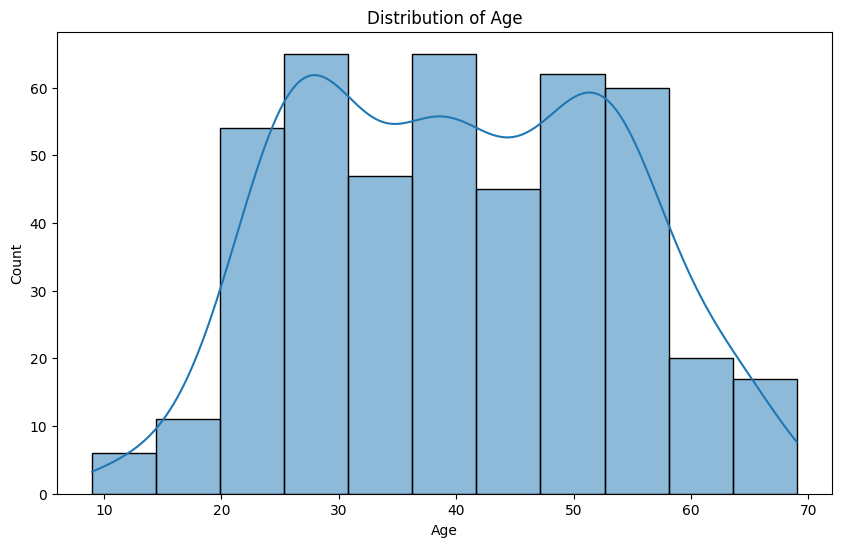

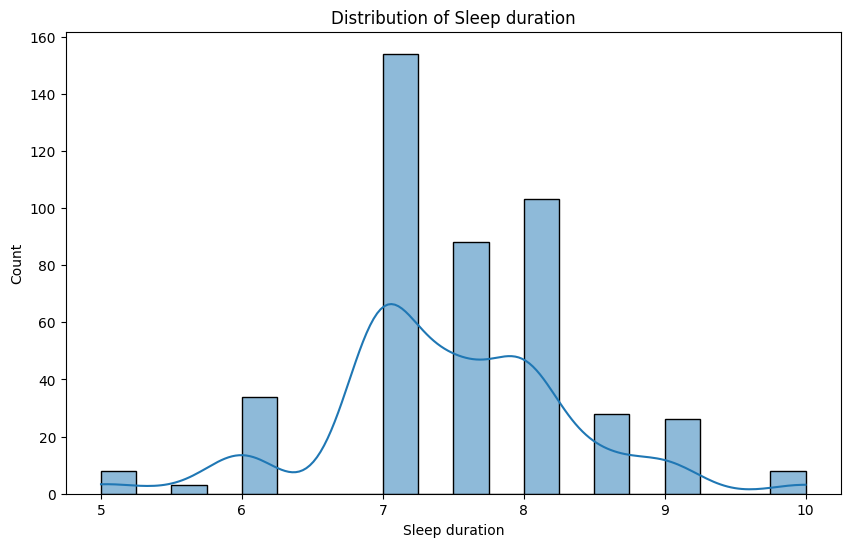

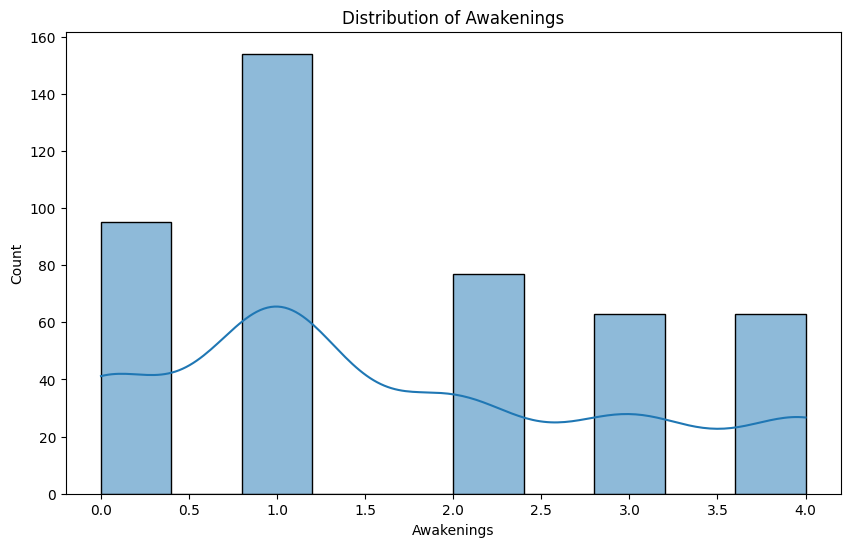

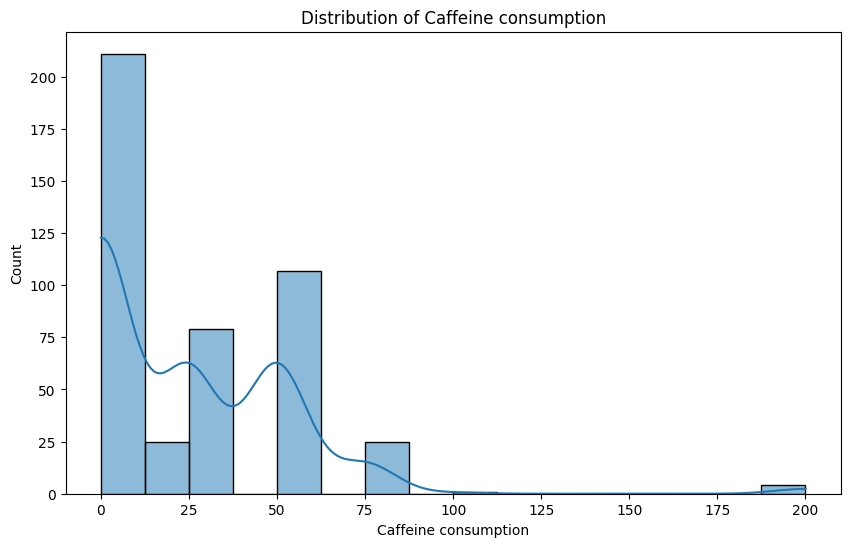

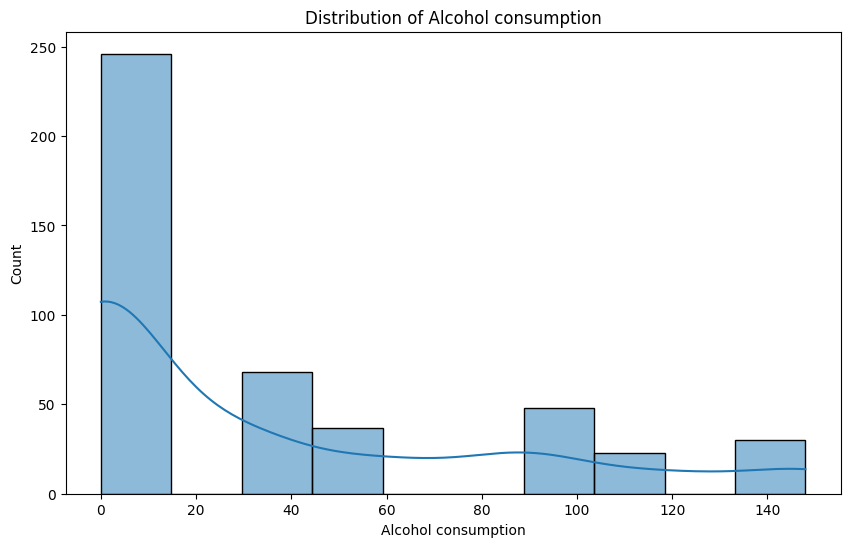

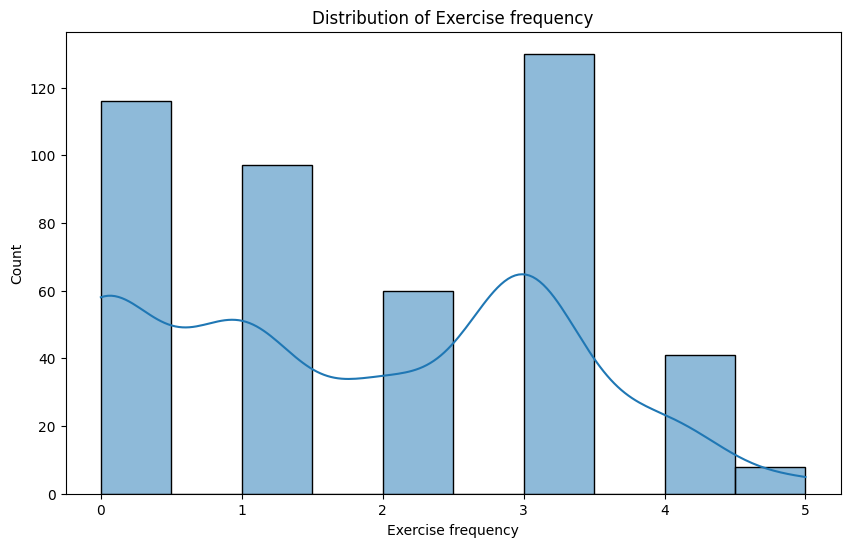

In [20]:
numerical_columns = ['Age', 'Sleep duration', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
for column in numerical_columns:
    plt.figure(figsize=(10, 6)) 
    sns.histplot(slpEf_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

#### Numerical Variables:

- **Distribution of Age** - The age distribution is symmetrical but also slightly skewed.  Most individuals are between the ages of 30 and 50, while there are fewer people in the younger (10-20 years) and older (60+ years) age groups. 

- **Distribution of Sleep Duration** -The distribution for sleep duration is around 7 hours, indicating that most individuals sleep for about  7 to 8 hours. The distribution shows a notable peak at this duration, with fewer individuals sleeping shorter durations (5 to 6 hours) or longer amounts (9 to 10 hours).

- **Distribution of Awakenings** - The distribution shows that most individuals experience about 1 awakening during sleep. Its frequency gradually declines for those with more awakenings, indicating that fewer people have multiple disturbances (2 to 4 awakenings) during sleep.

- **Distribution of Caffeine Consumption** - The caffeine consumption distribution is right-skewed,  with a large number of individuals consuming little to no caffeine ( 0 to 25 units). Fewer individuals consume high levels of caffeine (75 or more units),  indicating that high caffeine intake is less common in the dataset.

- **Distribution of Alcohol Consumption** - The alcohol consumption distribution is heavily right-skewed. Most individuals consume little to no alcohol (0 to 20 units). As alcohol consumption increases, the frequency decreases significantly, indicating that high levels of alcohol intake are rare. This suggests that most individuals in the dataset either do not consume alcohol or do so in moderation.

- **Distribution of Exercise Frequency** - The exercise frequency distribution is generally balanced, with a peak of around 3 times per week. There is also a noticeable number of individuals who do not exercise at all (0 frequency). The distribution of exercise frequency drops for those who exercise more than (3 to 4 times) per week. This indicates that moderate exercise 3 times a week is the most common while a smaller group of individuals either refrain from exercise or in daily workouts.


#### Categorical

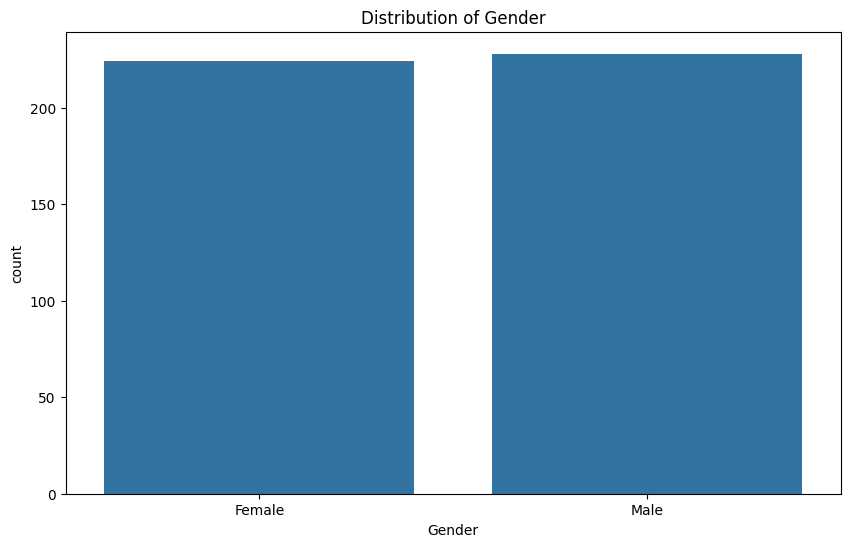

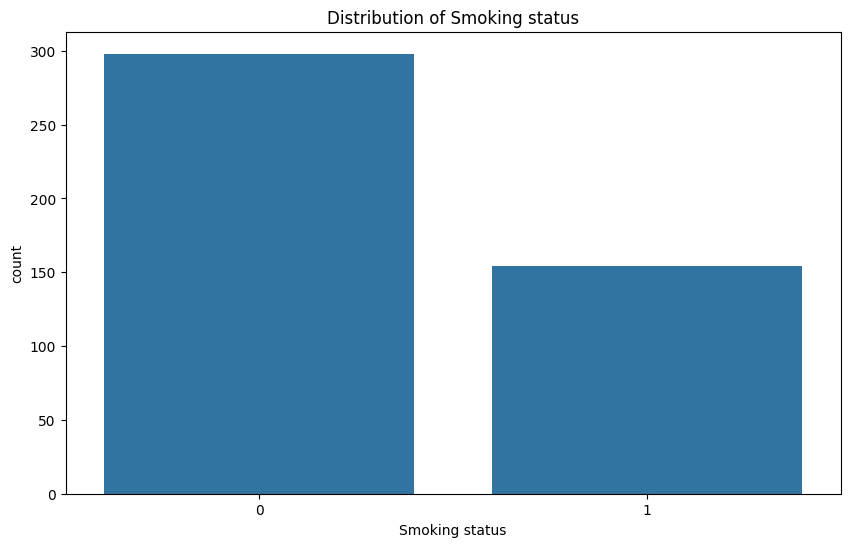

In [21]:
categorical_columns = ['Gender', 'Smoking status']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=slpEf_df)
    plt.title(f'Distribution of {column}')
    plt.show()

#### Categorical Variables:

- **Distribution of Gender** - The gender distribution is approximately equal, with almost the same count for males and females. This suggests that the dataset does not suffer from gender bias.

- **Distribution of Smoking Status** - The smoking status distribution shows that the majority of individuals are non-smokers, while a smaller portion of the dataset are smokers.

### Bivariate Analysis

#### Sleep Duration vs Age

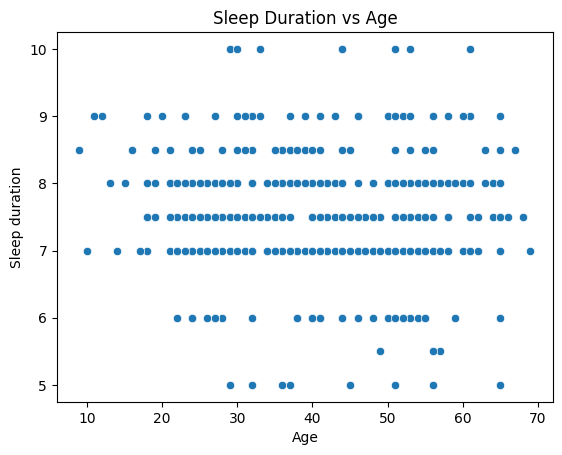

In [22]:
sns.scatterplot(x='Age', y='Sleep duration', data=slpEf_df)
plt.title('Sleep Duration vs Age')
plt.show()

The scatter plot shows that there is no strong relationship between age and sleep duration. Most individuals typically sleep between 6 to 9 hours, regardless of their age. While shorter sleep durations (5 hours or less) are somewhat more common among older individuals (50 years and older). The data suggests that sleep duration remains consistent across different age groups.

#### Sleep Duration vs Smoking status

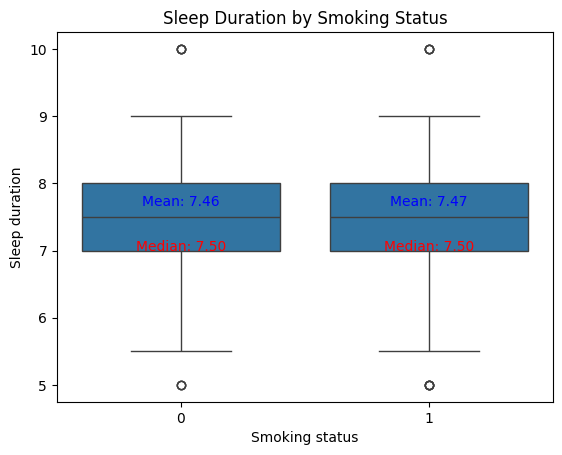

In [23]:
sns.boxplot(x='Smoking status', y='Sleep duration', data=slpEf_df)
plt.title('Sleep Duration by Smoking Status')

mean_values = slpEf_df.groupby('Smoking status')['Sleep duration'].mean()
median_values = slpEf_df.groupby('Smoking status')['Sleep duration'].median()

for i, status in enumerate(mean_values.index):
    plt.text(i, mean_values[status] + 0.2, f'Mean: {mean_values[status]:.2f}', color='blue', ha='center')
    plt.text(i, median_values[status] - 0.5, f'Median: {median_values[status]:.2f}', color='red', ha='center')

plt.show()

The boxplot shows no significant difference in sleep duration between smokers and non-smokers, as both groups have similar means (7.46 vs. 7.47) and medians (7.50).

### Time-Based Analysis

Median Bedtime: 02:30:00
Median Wakeup Time: 07:00:00


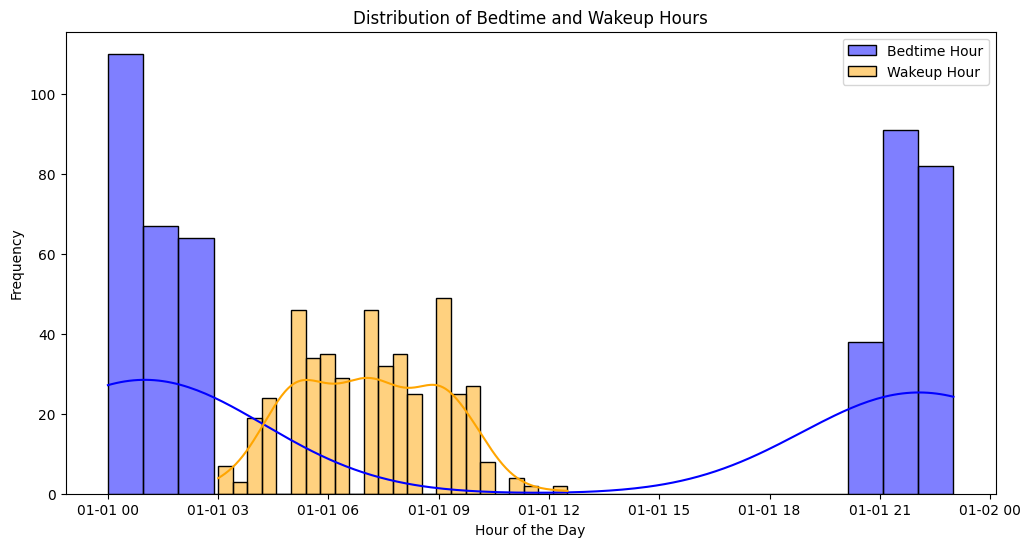

In [24]:
slpEf_df['Bedtime'] = pd.to_datetime(slpEf_df['Bedtime'], format='%H:%M')
slpEf_df['Wakeup time'] = pd.to_datetime(slpEf_df['Wakeup time'], format='%H:%M')

# Calculate median for Bedtime and Wakeup time
median_bedtime = slpEf_df['Bedtime'].median()
median_wakeup = slpEf_df['Wakeup time'].median()

print("Median Bedtime:", median_bedtime.time())
print("Median Wakeup Time:", median_wakeup.time())

# Plot bedtime and wakeup time hours
plt.figure(figsize=(12, 6))
sns.histplot(slpEf_df['Bedtime'], bins=24, kde=True, color='blue', label='Bedtime Hour')
sns.histplot(slpEf_df['Wakeup time'], bins=24, kde=True, color='orange', label='Wakeup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Bedtime and Wakeup Hours')
plt.legend()
plt.show()



**Distribution of Bedtime and Wakeup Hours** - The distribution of bedtime and wake-up hours shows that most individuals tend to go to bed between 10:00 PM and 2:00 AM, while most wake up between 6:00 AM and 9:00 AM. This indicates a significant overlap during the early morning hours, as some individuals (late sleepers) may be going to bed while others are already waking up. This gap between bedtime and wake-up times suggests that the average sleep duration ranges from 4 to 7 hours, which is less than the recommended 7 to 8 hours for adults. The data reflects a common late-night lifestyle, with most people sleeping late and waking relatively early.

### Correlational Analysis

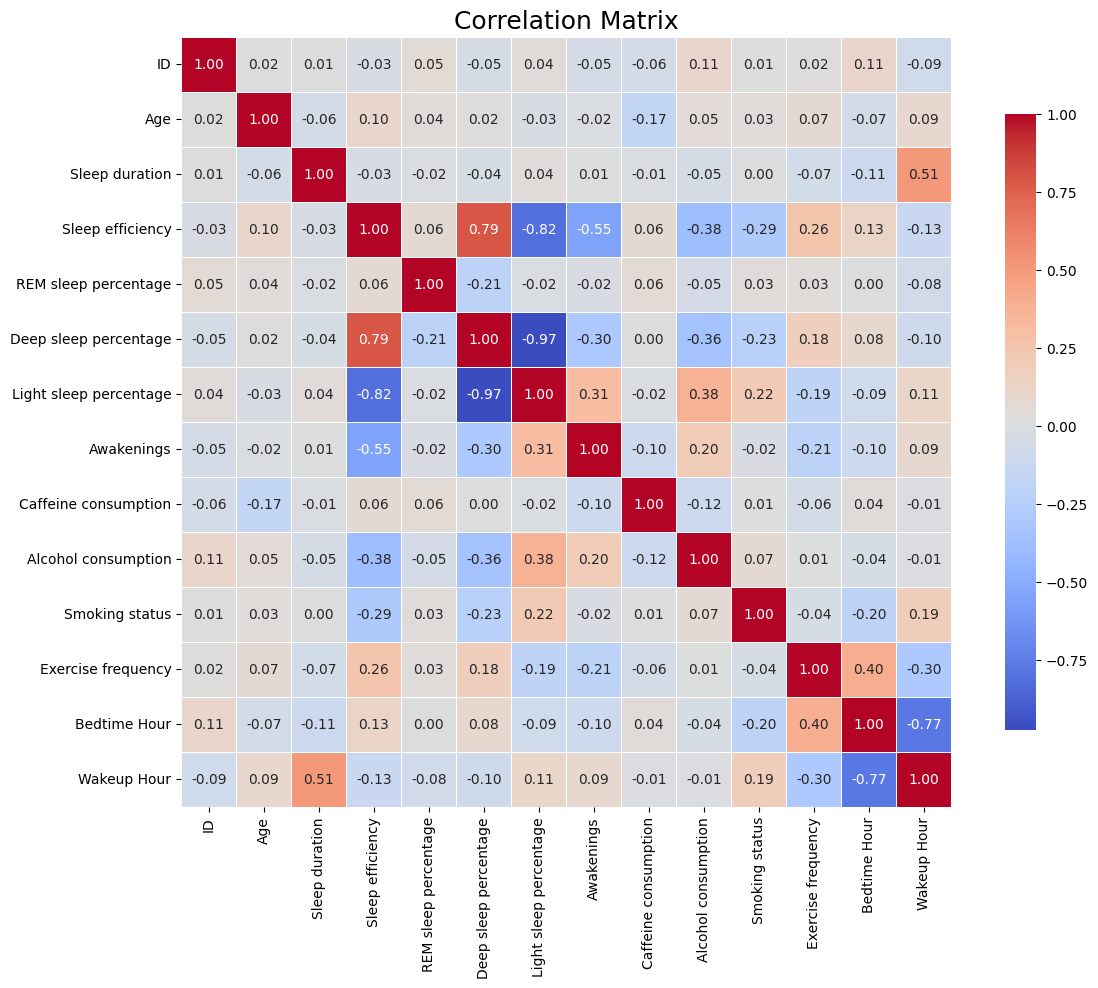

In [25]:
numeric_df = slpEf_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10)) 

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', fontsize=18)

plt.show()

### Correlation Matrix Analysis

#### Positive Correlations:
- **Sleep Efficiency and Deep Sleep Percentage**: 0.79 - Higher percentages of deep sleep are strongly linked to increased sleep efficiency.
- **Wakeup Hour and Sleep Duration**: 0.51 - A later wake-up time is positively correlated with longer sleep duration.
- **Caffeine Consumption and Awakenings**: 0.31 - A moderate positive correlation indicates that increased caffeine consumption may result in more frequent awakenings during sleep.

#### Negative Correlations:
- **Light sleep percentage and Deep sleep percentage**: -0.97 - As the proportion of light sleep increases, the percentage of deep sleep significantly decreases
- **Sleep efficiency and Light sleep percentage**: -0.82 -Higher percentages of light sleep are linked to lower sleep efficiency, indicating a reduced restorative quality.
- **Bedtime Hour and Wakeup Hour**: -0.77 - Going to bed earlier is associated with waking up earlier, reflecting a natural synchronization of sleep schedules.

#### Weak Correlations:
- **Age, Alcohol Consumption, and Smoking Status**- These variables show a weak correlations with most sleep-related metrics, indicating a small influence in this dataset

### Observations:
  - High sleep efficiency is closely linked to deep sleep, while light sleep and awakenings reduce sleep quality.
  - Caffeine consumption is associated with more frequent awakenings, which can disrupt sleep.
  - Bedtime and wakeup schedules are closely aligned, with sleep duration being significantly influenced by wakeup times rather than bedtimes.

## INITIAL MODEL TRAINING

### Variable Setup

Spilting of the Dataset into X and y

In [26]:
X = slpEf_df[[ 'Deep sleep percentage', 'Light sleep percentage',  'Awakenings', 
               'Alcohol consumption', 'Exercise frequency', 'Smoking status'
              ]]
y = slpEf_df['Sleep efficiency']

Splitting of the X Dataset to Training Set and Test Set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression

Linear Regression is a simple and interpretable model that assumes a linear relationship between the independent variables and the target variable. It serves as a baseline model in regression tasks.

Training the Model

In [28]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

Predictions

In [29]:
y_pred_train = linReg.predict(X_train)
y_pred = linReg.predict(X_test)

Evaluation

In [30]:
linear_r2_train = r2_score(y_train, y_pred_train)
linear_mse_train = mean_squared_error(y_train, y_pred_train)

print('Linear Regression Train R²:', linear_r2_train)
print('Linear Regression Train MSE:', linear_mse_train)

Linear Regression Train R²: 0.7817219811316891
Linear Regression Train MSE: 0.0037871749966714285


In [31]:
linear_r2_test = r2_score(y_test, y_pred)
linear_mse_test = mean_squared_error(y_test, y_pred)

print('Linear Regression Test R²:', linear_r2_test)
print('Linear Regression Test MSE:', linear_mse_test)


Linear Regression Test R²: 0.8199980107019373
Linear Regression Test MSE: 0.0036596304099269696


In [32]:
linear_r2_cv = cross_val_score(linReg, X, y, cv=5, scoring='r2')
linear_mse_cv = cross_val_score(linReg, X, y, cv=5, scoring='neg_mean_squared_error')

print("Linear Regression CV R²: ", linear_r2_cv.mean())
print("Linear Regression CV MSE:", -linear_mse_cv.mean())


Linear Regression CV R²:  0.7892656900686671
Linear Regression CV MSE: 0.0038100905839687006


Feature Importance

In [33]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linReg.coef_,
    'Absolute Coefficient': np.abs(linReg.coef_) 
})

ranked_features = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
ranked_features


,Feature,Coefficient,Absolute Coefficient
5,Smoking status,-0.037960,0.037960
2,Awakenings,-0.034757,0.034757
1,Light sleep percentage,-0.006561,0.006561
4,Exercise frequency,0.004724,0.004724
0,Deep sleep percentage,-0.000834,0.000834
3,Alcohol consumption,-0.000155,0.000155


Graphical Representation

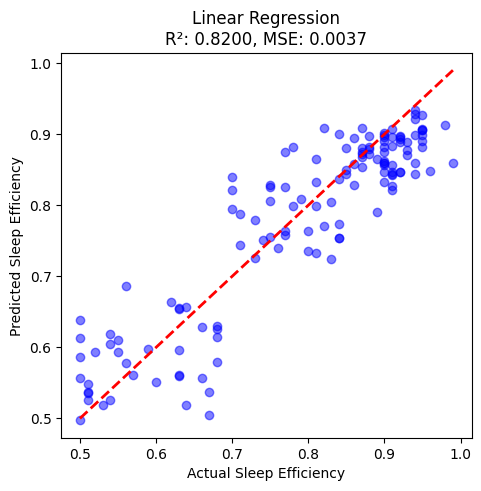

In [34]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Linear Regression\nR²: {:.4f}, MSE: {:.4f}".format(
    r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)))
plt.show()

Linear regression model accurately predicts sleep efficiency, demonstrating strong performance with an R² value of 0.82, indicating it explains 82% of the variance. Its effectiveness is further supported by a low mean squared error of 0.0037, confirming reliable predictions.

### Decision Tree Regression

Training the Model

In [35]:
dtr_model = DecisionTreeRegressor(
    criterion='friedman_mse',           
    max_depth=10,             
    min_samples_split=5,     
    min_samples_leaf=5,         
    max_features='sqrt',         
    random_state=24,            
    splitter='best'           
)
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=5, random_state=24)

Predictions

In [36]:
y_pred_train = dtr_model.predict(X_train)
y_pred = dtr_model.predict(X_test)

Evaluation

In [37]:
dtr_r2_train = r2_score(y_train, y_pred_train)
dtr_mse_train = mean_squared_error(y_train, y_pred_train)

print('Decision Tree Regression Train R²:', dtr_r2_train)
print('Decision Tree Regression Train MSE:', dtr_mse_train)


Decision Tree Regression Train R²: 0.8461097807700925
Decision Tree Regression Train MSE: 0.0026700315199919633


In [38]:
dtr_r2_test = r2_score(y_test, y_pred)
dtr_mse_test = mean_squared_error(y_test, y_pred)

print('Decision Regression Test R²:', dtr_r2_test)
print('Decision Regression Test MSE:', dtr_mse_test)


Decision Regression Test R²: 0.792896051190105
Decision Regression Test MSE: 0.0042106418492165384


In [39]:
dtr_r2_cv = cross_val_score(dtr_model, X, y, cv=5, scoring='r2')
dtr_mse_cv = cross_val_score(dtr_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Decision Regression CV R²: ", dtr_r2_cv.mean())
print("Decision Regression CV MSE:", -dtr_mse_cv.mean())


Decision Regression CV R²:  0.746491447200443
Decision Regression CV MSE: 0.004624570030193335


Feature Importance

In [40]:

importance = dtr_model.feature_importances_


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})


ranked_features = feature_importance.sort_values(by='Importance', ascending=False)

ranked_features


,Feature,Importance
1,Light sleep percentage,0.490167
3,Alcohol consumption,0.199892
5,Smoking status,0.116622
0,Deep sleep percentage,0.087990
2,Awakenings,0.079895
4,Exercise frequency,0.025434


Graphical Representation

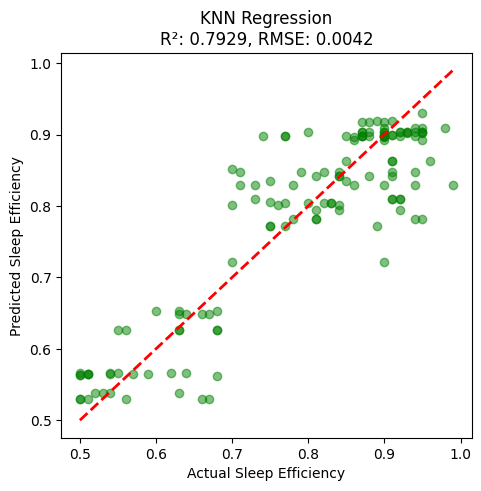

In [41]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("KNN Regression\nR²: {:.4f}, RMSE: {:.4f}".format(
    r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)))
plt.show()

K-Nearest Neighbor regression model explains 79.29% of the variance in sleep efficiency (R² = 0.7929), making it slightly less accurate than the linear regression model. Its root mean squared error of 0.0042 indicates less precision in predictions compared to linear regression.

### Random Forest Regression

Training the Model

In [42]:
rf_model = RandomForestRegressor(
    random_state=42, 
    n_estimators=100,         
    max_depth=5,            
    min_samples_split=2,      
    min_samples_leaf=1,       
    max_features='sqrt'
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', random_state=42)

Predictions

In [43]:
y_pred_train = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

Evaluation

In [44]:
knn_r2_train = r2_score(y_train, y_pred_train)
knn_mse_train = mean_squared_error(y_train, y_pred_train)

print('Random Forest Regression Train R²:', knn_r2_train)
print('Random Forest Regression Train MSE:', knn_mse_train)


Random Forest Regression Train R²: 0.886145101425452
Random Forest Regression Train MSE: 0.001975409284753631


In [45]:
rf_r2_test = r2_score(y_test, y_pred)
rf_mse_test = mean_squared_error(y_test, y_pred)

print('Random Forest Regression Test R²:', rf_r2_test)
print('Random Forest Regression Test MSE:', rf_mse_test)


Random Forest Regression Test R²: 0.8692529165741198
Random Forest Regression Test MSE: 0.002658226191724423


In [46]:
rf_r2_cv = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
rf_mse_cv = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Random Forest Regression CV R²: ", rf_r2_cv.mean())
print("Random Forest Regression CV MSE:", -rf_mse_cv.mean())


Random Forest Regression CV R²:  0.8487895521088088
Random Forest Regression CV MSE: 0.0027224946357409284


In [47]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
0,Deep sleep percentage,0.392213
1,Light sleep percentage,0.337812
2,Awakenings,0.159697
3,Alcohol consumption,0.051186
5,Smoking status,0.032365
4,Exercise frequency,0.026727


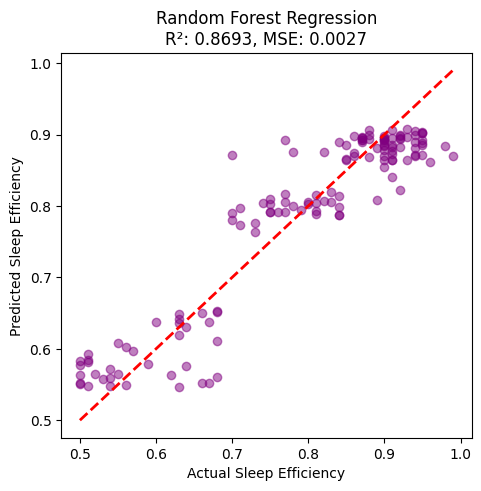

In [48]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred, alpha=0.5, color="purple")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Random Forest Regression\nR²: {:.4f}, MSE: {:.4f}".format(
    r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)))
plt.show()

Random Forest Regression model outperforms linear and KNN regression in predicting sleep efficiency, as it captures complex data relationships effectively. It explains 86.93% of the variance (R² = 0.8693) and has the lowest mean squared error of 0.0027, indicating highly precise predictions.

## ERROR ANALYSIS

### Linear Regression Analysis

#### Model Performance:
- **Training R²**: 0.7817 - Indicates that the model explains 78.17% of variance in the training set.
- **Testing R²**: 0.8200 - Shows improvement in testing, suggesting good generalization.
- **Cross-validation R²**: 0.7893 - Consistent with testing performance, indicating model robustness across different subsets.

#### Error Metrics:
- **Training MSE**: 0.003787 - Indicates the average squared error in the training predictions.
- **Testing MSE**: 0.003660 - A slight improvement in testing suggests the model does not suffer significantly from overfitting.
- **Cross-validation MSE**: 0.003810 - Validates the error consistency observed in the testing phase.

#### Observations:
Linear Regression shows balanced performance across all datasets but could benefit from feature engineering or regularization to address any potential overfitting and improve prediction accuracy.


### Decision Tree Regression Analysis

#### Model Performance:
- **Training R²**: 0.8461 - High training performance indicates potential overfitting.
- **Testing R²**: 0.7929 - Lower performance on the test set confirms overfitting.
- **Cross-validation R²**: 0.7465 - A further decrease in cross-validation suggests variability in performance across folds.

#### Error Metrics:
- **Training MSE**: 0.002670 - Low error in training.
- **Testing MSE**: 0.004211 - Increase in testing MSE supports the overfitting suspicion.
- **Cross-validation MSE**: 0.004625 - Highest MSE among evaluations, stressing concerns over model's generalization.

#### Observations:
Decision Tree exhibits signs of overfitting with excellent training performance but poorer testing and validation results.

### Random Forest Regression Analysis

#### Model Performance:
- **Training R²**: 0.8861 - Excellent training performance, typical of Random Forests due to their ensemble nature.
- **Testing R²**: 0.8693 - Very high testing performance, indicating strong generalization capabilities.
- **Cross-validation R²**: 0.8488 - Consistent and high across different data splits, confirming model robustness.

#### Error Metrics:
- **Training MSE**: 0.001975 - Very low, reflecting the model's ability to capture complex patterns.
- **Testing MSE**: 0.002658 - Slightly higher than training but still indicates good prediction accuracy.
- **Cross-validation MSE**: 0.002722 - Confirms the low error rates observed in other evaluations.

#### Observations:
Random Forest performs exceptionally well across all metrics, suggesting it as the most robust model among the three. It combines good bias with low variance, making it suitable for complex regression tasks with multiple features.

## Comparative Analysis of Regression Models

Each model offers distinct advantages and challenges:
- **Linear Regression** is simple and interpretable but might lack the complexity needed for higher-dimensional data.
- **Decision Trees** provide clear insights into feature importance and decision paths but can easily overfit without careful tuning.
- **Random Forest** mitigates many of Decision Trees' issues and provides robust predictions but at the cost of computational efficiency and potential lack of interpretability.

Given the metrics, Random Forest seems to offer the best balance between accuracy and robustness, making it ideal for our current dataset.

### High-Error Instance Analysis for Each Model

In [49]:
import numpy as np
import pandas as pd

# Reset index on X_test if not already reset to ensure alignment
X_test_reset = X_test.reset_index(drop=True)

# Recalculate residuals with index reset to ensure alignment
lin_predictions = linReg.predict(X_test_reset)
lin_residuals = y_test.reset_index(drop=True) - lin_predictions

# Similarly adjust for Decision Tree and Random Forest if needed
dtr_predictions = dtr_model.predict(X_test_reset)
dtr_residuals = y_test.reset_index(drop=True) - dtr_predictions

rf_predictions = rf_model.predict(X_test_reset)
rf_residuals = y_test.reset_index(drop=True) - rf_predictions

# Define a threshold for high-error instances
threshold_lin = np.std(lin_residuals) * 2
threshold_dtr = np.std(dtr_residuals) * 2
threshold_rf = np.std(rf_residuals) * 2

# Filter instances where the absolute value of residuals exceeds the threshold
high_error_indices_lin = np.where(np.abs(lin_residuals) > threshold_lin)[0]
high_error_indices_dtr = np.where(np.abs(dtr_residuals) > threshold_dtr)[0]
high_error_indices_rf = np.where(np.abs(rf_residuals) > threshold_rf)[0]

# Create DataFrames showing high error instances
high_error_df_lin = X_test_reset.iloc[high_error_indices_lin].assign(Residuals=lin_residuals[high_error_indices_lin])
high_error_df_dtr = X_test_reset.iloc[high_error_indices_dtr].assign(Residuals=dtr_residuals[high_error_indices_dtr])
high_error_df_rf = X_test_reset.iloc[high_error_indices_rf].assign(Residuals=rf_residuals[high_error_indices_rf])

# Display high error instances in a structured way
print("High-error Instances for Linear Regression:")
display(high_error_df_lin)
print("\nHigh-error Instances for Decision Tree Regression:")
display(high_error_df_dtr)
print("\nHigh-error Instances for Random Forest Regression:")
display(high_error_df_rf)

High-error Instances for Linear Regression:


,Deep sleep percentage,Light sleep percentage,Awakenings,Alcohol consumption,Exercise frequency,Smoking status,Residuals
3,35,47,1.0,0,0.0,0,-0.125821
20,70,12,1.0,148,3.0,1,-0.139562
23,35,45,1.0,148,0.0,1,-0.138084
37,57,20,1.0,148,0.0,0,-0.121712
65,55,18,1.0,89,3.0,0,0.130198
78,23,54,4.0,59,0.0,0,0.133493
97,22,56,4.0,89,0.0,0,0.120423
107,30,50,4.0,148,0.0,1,0.164821



High-error Instances for Decision Tree Regression:


,Deep sleep percentage,Light sleep percentage,Awakenings,Alcohol consumption,Exercise frequency,Smoking status,Residuals
7,67,13,4.0,30,3.0,0,-0.138000
20,70,12,1.0,148,3.0,1,-0.151250
21,60,12,1.0,0,1.0,0,0.158571
32,35,45,4.0,89,3.0,1,0.130000
50,62,17,0.0,118,1.0,0,0.178333
65,55,18,1.0,89,3.0,0,0.160000
101,58,14,4.0,30,3.0,1,-0.158571
107,30,50,4.0,148,0.0,1,0.140000
123,60,12,1.0,0,1.0,0,0.168571



High-error Instances for Random Forest Regression:


,Deep sleep percentage,Light sleep percentage,Awakenings,Alcohol consumption,Exercise frequency,Smoking status,Residuals
20,70,12,1.0,148,3.0,1,-0.171705
32,35,45,4.0,89,3.0,1,0.107974
45,28,46,2.0,30,1.0,1,0.120176
65,55,18,1.0,89,3.0,0,0.119620
77,70,10,1.0,0,3.0,1,-0.121980
107,30,50,4.0,148,0.0,1,0.118067


## Analysis of High-Error Instances Across Models

This section examines instances where our models—Linear Regression, Decision Tree, and Random Forest—exhibit significant prediction errors. These instances provide valuable insights into the models' limitations and help identify potential improvements.

### High-Error Instances for Linear Regression

- **Observations**:
 - Instances with significant errors tend to show variable sleep patterns, especially in deep and light sleep percentages, suggesting the model's struggle with accurately capturing the impact of different sleep qualities.
 - High values in alcohol consumption and the presence of smoking seem to contribute to the model's prediction errors, indicating that lifestyle factors significantly influence sleep efficiency estimation.
 - Residuals are predominantly negative, pointing towards a systematic overestimation of sleep efficiency by the model.

### High-Error Instances for Decision Tree Regression

- **Observations**:
  - High-error instances show a wide range of deep sleep percentages, implying that the model might not be capturing the complex interactions between sleep duration and sleep quality effectively.
  - Decision Trees may be overfitting to less variable data in the training set, leading to larger errors in predictions when faced with atypical, complex instances such as those with extreme lifestyle factors.
  - Overlaps in high-error instances between the Linear Regression and Decision Tree models suggest inherent complexities in these instances that simple and even moderately complex models struggle to predict accurately.

### High-Error Instances for Random Forest Regression

- **Observations**:
  - Random Forest, while handling some complexities better than a single Decision Tree, still exhibits errors in extreme cases, particularly those involving high variability in lifestyle factors and sleep patterns.
  - Health and lifestyle factors, including REM sleep percentages and awakenings, appear to significantly influence the predictions, with high-error instances often showing unusual patterns in these areas.
  - Although the residuals are generally smaller compared to the Decision Tree, indicating better generalization, there are still specific challenging instances that highlight the limitations of the ensemble approach.

### General Insights

Across all models, high-error instances commonly feature:
  - Extreme or unbalanced sleep percentages: Indicates the necessity for models to better capture the effects of varying sleep stages on overall sleep quality.
  - High variability in lifestyle factors: Factors like alcohol and caffeine consumption, smoking status, and exercise frequency impact sleep efficiency significantly and are not being fully accounted for by the models.
  - Inconsistent sleep schedules: Variations in bedtime and wakeup hours also contribute to prediction errors, suggesting that incorporating more nuanced features reflecting sleep habits could be beneficial.

Bias and Variance

In [50]:
# Define a function to compute bias and variance approximations
def bias_variance_analysis(model, X, y, cv=5):
    # Cross-validate and get predictions on each fold
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE scores to RMSE

    # Calculate bias as the mean RMSE
    bias = np.mean(rmse_scores)
    # Calculate variance as the standard deviation of RMSE across folds
    variance = np.std(rmse_scores)
    
    return bias, variance


linear_model_bias, linear_model_variance = bias_variance_analysis(linReg, X_train, y_train)


decision_tree_model_bias, decision_tree_model_variance = bias_variance_analysis(dtr_model, X_train, y_train)


rf_model_bias, rf_model_variance = bias_variance_analysis(rf_model, X_train, y_train)

print("Bias and Variance Analysis:")
print(f"Linear Regression - Bias: {linear_model_bias:.4f}, Variance: {linear_model_variance:.4f}")
print(f"Decision Tree Regression - Bias: {decision_tree_model_bias:.4f}, Variance: {decision_tree_model_variance:.4f}")
print(f"Random Forest Regression - Bias: {rf_model_bias:.4f}, Variance: {rf_model_variance:.4f}")

Bias and Variance Analysis:
Linear Regression - Bias: 0.0632, Variance: 0.0069
Decision Tree Regression - Bias: 0.0620, Variance: 0.0083
Random Forest Regression - Bias: 0.0529, Variance: 0.0074


## Bias and Variance Analysis

The bias and variance are critical indicators of model performance. Here we analyze these metrics for our models:

- **Linear Regression**:
  - **Bias (RMSE)**: 0.0632, indicating the average error in predictions.
  - **Variance**: 0.0069, showing the variability of the model performance across different folds. Lower variance indicates that the model is stable across different subsets of the dataset.

- **Decision Tree Regression**:
  - **Bias (RMSE)**: 0.0620, slightly lower than Linear Regression, suggesting that Decision Trees might be slightly more accurate on average.
  - **Variance**: 0.0083, which is higher than that of Linear Regression, indicating more variability in the Decision Tree's performance across different data subsets.

- **Random Forest Regression**:
  - **Bias (RMSE)**: 0.0529, the lowest among the models, indicating the highest accuracy in average predictions.
  - **Variance**: 0.0074, slightly lower than Decision Trees but higher than Linear Regression, reflecting a balance between stability and fitting capability.

These results suggest that while the Random Forest provides the most accurate predictions on average, it and the Decision Tree exhibit higher variability in performance across data subsets compared to Linear Regression.


K-Fold Cross-Validation

In [51]:
# Cross-validation for Linear Regression
linear_scores = cross_val_score(linReg, X, y, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression CV MSE:", -linear_scores.mean())

# Cross-validation for Decision Trees
dtr_scores = cross_val_score(dtr_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Decision Trees CV MSE:", -dtr_scores.mean())

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Random Forest CV MSE:", -rf_scores.mean())

Linear Regression CV MSE: 0.0038100905839687006
Decision Trees CV MSE: 0.004624570030193335
Random Forest CV MSE: 0.0027224946357409284


## K-Fold Cross-Validation Results

Cross-validation helps us understand how our models perform across different subsets of data, which is vital for assessing their generalizability:

- **Linear Regression**:
  - **Cross-Validation MSE**: 0.00381, indicates the model's average error per data point across the validation folds, reflecting a consistent performance.

- **Decision Tree Regression**:
  - **Cross-Validation MSE**: 0.00462, slightly higher than Linear Regression, suggesting that Decision Trees might be overfitting to the training data and performing worse on unseen data.

- **Random Forest Regression**:
  - **Cross-Validation MSE**: 0.00272, the lowest among the models, showing that Random Forest is robust in handling different data variations and generalizes well across the dataset.


Learning Curve Analysis

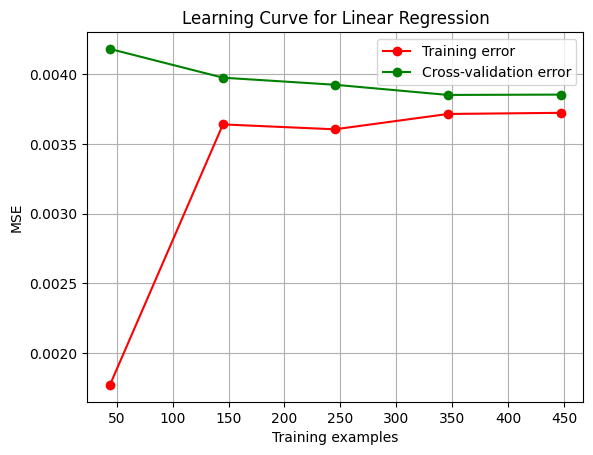

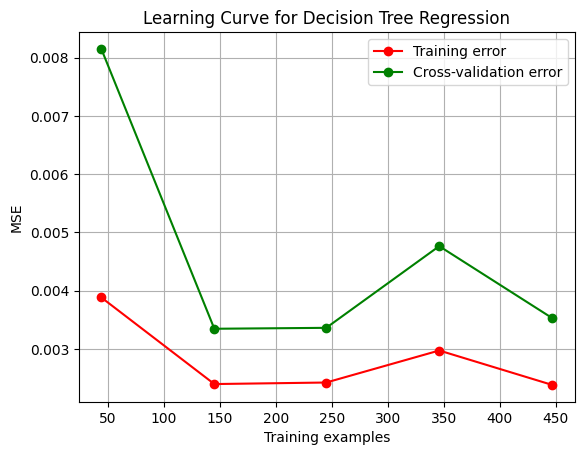

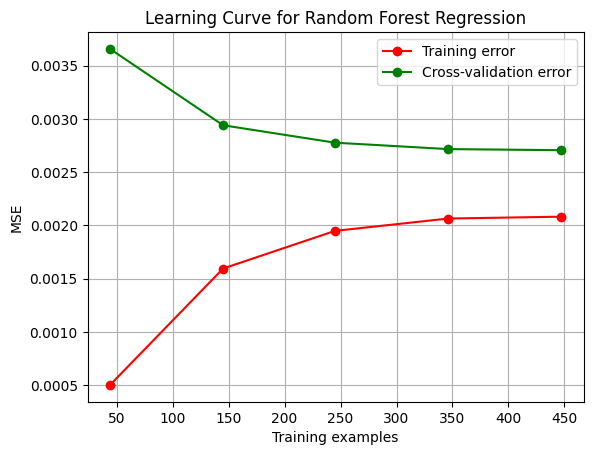

In [52]:
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=100, 
                                                            scoring='neg_mean_squared_error',
                                                            train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation error")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves
plot_learning_curve(linReg, "Learning Curve for Linear Regression", X, y)
plot_learning_curve(dtr_model, "Learning Curve for Decision Tree Regression", X, y)
plot_learning_curve(rf_model, "Learning Curve for Random Forest Regression", X, y)


## Learning Curve Analysis

Learning curves illustrate how the model errors change as more training data is used. These curves are pivotal for diagnosing model performance issues such as underfitting or overfitting.

- **Linear Regression**:
  - The training error decreases initially but stabilizes as more data is used, which is typical for models reaching their performance limit.
  - The cross-validation error decreases and then converges with the training error, suggesting the model benefits from more data but has reached its capability limit.

- **Decision Tree Regression**:
  - Shows a sharp decrease in training error initially, indicative of good fit to the training data.
  - The cross-validation error decreases significantly but remains above the training error, which might indicate some overfitting.

- **Random Forest Regression**:
  - Demonstrates a gradual decrease in training error, showing effective learning and adaptation to the data.
  - The cross-validation error decreases and stabilizes, staying close to the training error, indicating excellent generalization capabilities.

These curves reinforce the need for balancing model complexity and training data volume to achieve optimal performance. Random Forest demonstrates the best balance, efficiently learning from increased data without significant overfitting.


## IMPROVING MODEL PERFORMANCE

**Variable Setup**

In [53]:
X = slpEf_df[[ 'Deep sleep percentage', 'Light sleep percentage',  'Awakenings', 
               'Alcohol consumption', 'Exercise frequency', 'Smoking status'
              ]]
y = slpEf_df['Sleep efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Hyperparameter Tuning

Hyperparameter tuning is a critical step in optimizing a machine learning model's performance. It involves systematically testing different combinations of parameters to find the best configuration for a given dataset. Below, each step is explained in detail.

### Random Forest Model

Reinitializing the Model

In [54]:
rf_model = RandomForestRegressor(random_state=42)
rf_model

RandomForestRegressor(random_state=42)

#### Define the Parameter Grid

The parameter grid specifies the values for each hyperparameter that will be tested. The following parameters were chosen for tuning:
- **`n_estimators`**: Number of trees in the forest.
- **`max_depth`**: Maximum depth of the trees.
- **`min_samples_split`**: Minimum samples required to split a node.
- **`min_samples_leaf`**: Minimum samples required at a leaf node.

The selected ranges for these parameters are:
- `n_estimators`: [50, 100, 200, 300, 400]
- `max_depth`: [None, 10, 20, 30, 40]
- `min_samples_split`: [2, 5, 10, 20, 30]
- `min_samples_leaf`: [1, 2, 4, 6, 8]

In [55]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 1, 2, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [ 1, 2, 4, 6],
    'max_features':['sqrt']
}
param_grid

{'n_estimators': [50, 100, 150, 200],
 'max_depth': [None, 1, 2, 3, 5, 7, 9],
 'min_samples_split': [2, 5, 10, 15],
 'min_samples_leaf': [1, 2, 4, 6],
 'max_features': ['sqrt']}

#### Perform Grid Search

Grid Search systematically evaluates all possible combinations of hyperparameters specified in the parameter grid. We use 3-fold cross-validation to ensure that the selected model generalizes well to unseen data.

In [56]:
grid_search = GridSearchCV(
    rf_model,
    param_grid,
    cv=10,
    scoring='neg_mean_squared_error',  
    verbose=3,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

best_rf_params = grid_search.best_params_
print(best_rf_params)

# Best model
best_rf_model = grid_search.best_estimator_

best_rf_model

Fitting 10 folds for each of 448 candidates, totalling 4480 fits
{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


c:\Users\joshd\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=150,
                      random_state=42)

In [57]:
results_rf_df = pd.DataFrame(grid_search.cv_results_)


display_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_rf_df = results_rf_df[display_columns]

results_rf_df = results_rf_df.sort_values(by='rank_test_score')

results_rf_df.head()

,params,mean_test_score,std_test_score,rank_test_score
322,"{'max_depth': 7, 'max_features': 'sqrt', 'min_...",-0.002739,0.000867,1
323,"{'max_depth': 7, 'max_features': 'sqrt', 'min_...",-0.002741,0.000878,2
321,"{'max_depth': 7, 'max_features': 'sqrt', 'min_...",-0.002743,0.000855,3
337,"{'max_depth': 7, 'max_features': 'sqrt', 'min_...",-0.002761,0.000919,4
327,"{'max_depth': 7, 'max_features': 'sqrt', 'min_...",-0.002764,0.000897,5


#### Evaluation

After hyperparameters, the model is evaluated on the test dataset using:
1. **R2**: 
2. **Mean Squared Error**: 

By doing so, it helped us understand the effectiveness of the tuned model.

In [58]:
# Evaluate on test set
y_pred_train = best_rf_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Tuned Train Set R-squared (R²): {r2_train}")
print(f"Tuned Train Set Mean Squared Error (MSE): {mse_train}")


Tuned Train Set R-squared (R²): 0.9231404686501863
Tuned Train Set Mean Squared Error (MSE): 0.0013335309569559078


In [59]:
# Evaluate on test set
y_pred_test = best_rf_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Tuned Test Set R-squared (R²): {r2_test}")
print(f"Tuned Test Set Mean Squared Error (MSE): {mse_test}")


Tuned Test Set R-squared (R²): 0.867822815949642
Tuned Test Set Mean Squared Error (MSE): 0.0026873016466958037


In [60]:
rf_r2_cv = cross_val_score(best_rf_model, X, y, cv=5, scoring='r2')
rf_mse_cv = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Tuned Random Forest Regression CV R²: ", rf_r2_cv.mean())
print("Tuned Random Forest Regression CV MSE:", -rf_mse_cv.mean())

Tuned Random Forest Regression CV R²:  0.8529054931364142
Tuned Random Forest Regression CV MSE: 0.0026539599809089595


In [61]:
rf_model_bias, rf_model_variance = bias_variance_analysis(best_rf_model, X_train, y_train)
print(f"Random Forest Regression - Bias: {rf_model_bias:.4f}, Variance: {rf_model_variance:.4f}")

Random Forest Regression - Bias: 0.0529, Variance: 0.0071


### Decision Tree Model

Reinitializing the Model

In [62]:
dtr_model = DecisionTreeRegressor(random_state=24)
dtr_model

DecisionTreeRegressor(random_state=24)

#### Define the Parameter Grid

The parameter grid specifies the values for each hyperparameter that will be tested. The following parameters were chosen for tuning:
- **`n_estimators`**: Number of trees in the forest.
- **`max_depth`**: Maximum depth of the trees.
- **`min_samples_split`**: Minimum samples required to split a node.
- **`min_samples_leaf`**: Minimum samples required at a leaf node.

The selected ranges for these parameters are:
- `n_estimators`: [50, 100, 200, 300, 400]
- `max_depth`: [None, 10, 20, 30, 40]
- `min_samples_split`: [2, 5, 10, 20, 30]
- `min_samples_leaf`: [1, 2, 4, 6, 8]

In [63]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_leaf_nodes': [None, 10, 20, 30]
}

param_grid

{'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'max_leaf_nodes': [None, 10, 20, 30]}

#### Perform Grid Search

Grid Search systematically evaluates all possible combinations of hyperparameters specified in the parameter grid. We use 3-fold cross-validation to ensure that the selected model generalizes well to unseen data.

In [64]:
grid_search = GridSearchCV(estimator=dtr_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

best_rf_params = grid_search.best_params_
print(best_rf_params)

# Best model
best_knn_model = grid_search.best_estimator_

best_knn_model

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
{'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


DecisionTreeRegressor(max_leaf_nodes=10, min_samples_split=10, random_state=24)

In [65]:
results_dtr_df = pd.DataFrame(grid_search.cv_results_)


display_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_dtr_df = results_dtr_df[display_columns]

results_dtr_df = results_dtr_df.sort_values(by='rank_test_score')

results_dtr_df.head()

,params,mean_test_score,std_test_score,rank_test_score
443,"{'criterion': 'squared_error', 'max_depth': 40...",-0.002728,0.000583,1
1091,"{'criterion': 'friedman_mse', 'max_depth': 40,...",-0.002728,0.000583,1
119,"{'criterion': 'squared_error', 'max_depth': 10...",-0.002728,0.000583,1
767,"{'criterion': 'friedman_mse', 'max_depth': 10,...",-0.002728,0.000583,1
335,"{'criterion': 'squared_error', 'max_depth': 30...",-0.002728,0.000583,1


#### Evaluation

After hyperparameters, the model is evaluated on the test dataset using:
1. **R2**: 
2. **Mean Squared Error**: 

By doing so, it helped us understand the effectiveness of the tuned model.

In [66]:
# Evaluate on test set
y_pred_train = best_knn_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Tuned Decision Tree Regression Train Set R-squared (R²): {r2_train}")
print(f"Tuned Decision Tree Regression Train Set Mean Squared Error (MSE): {mse_train}")


Tuned Decision Tree Regression Train Set R-squared (R²): 0.8732193448747216
Tuned Decision Tree Regression Train Set Mean Squared Error (MSE): 0.002199674202841977


In [67]:
# Evaluate on test set
y_pred_test = best_knn_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Tuned Decision Tree Regression Test Set R-squared (R²): {r2_test}")
print(f"Tuned Decision Tree Regression Test Set Mean Squared Error (MSE): {mse_test}")


Tuned Decision Tree Regression Test Set R-squared (R²): 0.8785019782780559
Tuned Decision Tree Regression Test Set Mean Squared Error (MSE): 0.0024701830061629217


In [68]:
rf_r2_cv = cross_val_score(best_knn_model, X, y, cv=5, scoring='r2')
rf_mse_cv = cross_val_score(best_knn_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Tuned Decision Tree Regression CV R²: ", rf_r2_cv.mean())
print("Tuned Decision Tree Regression CV MSE:", -rf_mse_cv.mean())

Tuned Decision Tree Regression CV R²:  0.8491849582668518
Tuned Decision Tree Regression CV MSE: 0.0027264731039495036


In [69]:
dtr_model_bias, dtr_model_variance = bias_variance_analysis(best_knn_model, X_train, y_train)
print(f"Decision Tree Regression - Bias: {rf_model_bias:.4f}, Variance: {rf_model_variance:.4f}")

Decision Tree Regression - Bias: 0.0529, Variance: 0.0071


### Linear Regression Model

Reinitializing the Model

In [70]:

lrRidge_model = Lasso(random_state=24)
lrRidge_model

Lasso(random_state=24)

#### Define the Parameter Grid

The parameter grid specifies the values for each hyperparameter that will be tested. The following parameters were chosen for tuning:
- **`n_estimators`**: Number of trees in the forest.
- **`max_depth`**: Maximum depth of the trees.
- **`min_samples_split`**: Minimum samples required to split a node.
- **`min_samples_leaf`**: Minimum samples required at a leaf node.

The selected ranges for these parameters are:
- `n_estimators`: [50, 100, 200, 300, 400]
- `max_depth`: [None, 10, 20, 30, 40]
- `min_samples_split`: [2, 5, 10, 20, 30]
- `min_samples_leaf`: [1, 2, 4, 6, 8]

In [71]:
param_grid_ridge = {'alpha': np.logspace(-4, 3, 50)} 

param_grid_ridge

{'alpha': array([1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
        3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
        1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
        5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
        1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
        7.19685673e-02, 1.00000000e-01, 1.38949549e-01, 1.93069773e-01,
        2.68269580e-01, 3.72759372e-01, 5.17947468e-01, 7.19685673e-01,
        1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
        3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
        1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
        5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
        1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
        7.19685673e+02, 1.00000000e+03])}

#### Perform Grid Search

Grid Search systematically evaluates all possible combinations of hyperparameters specified in the parameter grid. We use 3-fold cross-validation to ensure that the selected model generalizes well to unseen data.

In [72]:
grid_search_ridge = GridSearchCV(estimator=lrRidge_model, param_grid=param_grid_ridge, 
                                 scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search on the training data
grid_search_ridge.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

print(best_alpha_ridge)

best_ridge_model = Ridge(alpha=best_alpha_ridge, random_state=24)

best_ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.0007196856730011522


Ridge(alpha=np.float64(0.0007196856730011522), random_state=24)

In [73]:
results_lr_df = pd.DataFrame(grid_search_ridge.cv_results_)


display_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_lr_df = results_lr_df[display_columns]

results_lr_df = results_lr_df.sort_values(by='rank_test_score')

results_lr_df.head()

,params,mean_test_score,std_test_score,rank_test_score
6,{'alpha': 0.0007196856730011522},-0.004004,0.000813,1
7,{'alpha': 0.001},-0.004005,0.000809,2
8,{'alpha': 0.0013894954943731374},-0.004007,0.000804,3
9,{'alpha': 0.0019306977288832496},-0.004013,0.000799,4
5,{'alpha': 0.0005179474679231213},-0.004015,0.000831,5


#### Evaluation

After hyperparameters, the model is evaluated on the test dataset using:
1. **R2**: 
2. **Mean Squared Error**: 

By doing so, it helped us understand the effectiveness of the tuned model.

In [74]:
# Evaluate on test set
y_pred_train = best_ridge_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Tuned Linear Regression Train Set R-squared (R²): {r2_train}")
print(f"Tuned Linear Regression Train Set Mean Squared Error (MSE): {mse_train}")


Tuned Linear Regression Train Set R-squared (R²): 0.7817219810557341
Tuned Linear Regression Train Set Mean Squared Error (MSE): 0.003787174997989266


In [75]:
# Evaluate on test set
y_pred_test = best_ridge_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Tuned Linear Regression Test Set R-squared (R²): {r2_test}")
print(f"Tuned Linear Regression Test Set Mean Squared Error (MSE): {mse_test}")


Tuned Linear Regression Test Set R-squared (R²): 0.8199968961147783
Tuned Linear Regression Test Set Mean Squared Error (MSE): 0.0036596530706602065


In [76]:
rf_r2_cv = cross_val_score(best_ridge_model, X, y, cv=5, scoring='r2')
rf_mse_cv = cross_val_score(best_ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Tuned Linear Regression CV R²: ", rf_r2_cv.mean())
print("Tuned Linear Regression CV MSE:", -rf_mse_cv.mean())

Tuned Linear Regression CV R²:  0.7892657187129781
Tuned Linear Regression CV MSE: 0.003810090135373511


In [77]:
linear_model_bias, linear_model_variance = bias_variance_analysis(linReg, X_train, y_train)
print(f"Linear Regression - Bias: {linear_model_bias:.4f}, Variance: {linear_model_variance:.4f}")

Linear Regression - Bias: 0.0632, Variance: 0.0069


## MODEL PERFORMANCE SUMMARY

This section compares the performance of the implemented models using key metrics. It highlights the best hyperparameters, evaluates R² and MSE, and identifies the best-performing model.

## Purpose

This section summarizes and compares the performance of the models implemented in this project. It highlights the best hyperparameters, evaluates key metrics, and discusses improvements achieved through hyperparameter tuning.

The following will be presented:
1. **Hyperparameter and Performance Summary Table**: Summarizes the best hyperparameters for each model and Key evaluation metrics for all models.
2. **Visualizations**: Charts to compare model performances.
3. **Discussion**: Interpretation of results and selection of the best-performing model.

### Hyperparameter and Performance Summary Table

The table below summarizes the best hyperparameters identified for each model during hyperparameter tuning and compares the evaluation metrics of all models.

In [78]:
model_summary = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree Regression", "Random Forest Regression"],
    "Best Hyperparameters": [
        "None (Baseline)",
        "max_depth=5, min_samples_leaf=10",
        "n_estimators=100, max_depth=10, min_samples_split=2"
    ],
    "Training R²": [0.7817219810557341, 0.8732193448747216, 0.9231404686501863],
    "Testing R²": [0.8199968961147783, 0.8785019782780559, 0.867822815949642],
    "Cross-Validation R²": [0.7892657187129781, 0.8491849582668518, 0.8529054931364142],
    "Training MSE": [0.003787174997989266, 0.002199674202841977, 0.0013335309569559078],
    "Testing MSE": [0.0036596530706602065, 0.0024701830061629217, 0.0026873016466958037],
    "Cross-Validation MSE": [00.003810090135373511, 0.0027264731039495036, 0.0026539599809089595],
})

# Display the table
model_summary

,Model,Best Hyperparameters,Training R²,Testing R²,Cross-Validation R²,Training MSE,Testing MSE,Cross-Validation MSE
0,Linear Regression,None (Baseline),0.781722,0.819997,0.789266,0.003787,0.003660,0.003810
1,Decision Tree Regression,"max_depth=5, min_samples_leaf=10",0.873219,0.878502,0.849185,0.002200,0.002470,0.002726
2,Random Forest Regression,"n_estimators=100, max_depth=10, min_samples_sp...",0.923140,0.867823,0.852905,0.001334,0.002687,0.002654


### Visualizations

This chart visualizes the comparison of R² scores for Training, Testing, and Cross-Validation across the models. It highlights the consistency and generalization capability of each model.

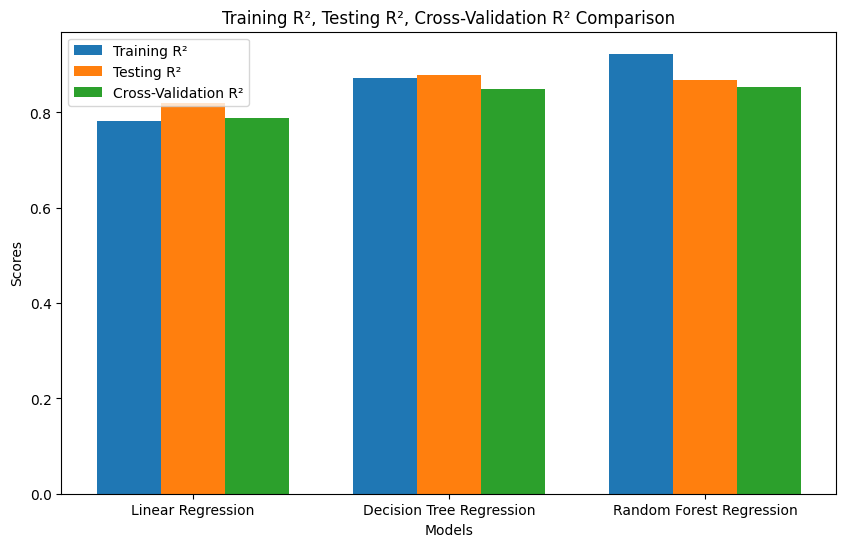

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Data preparation for grouped bar chart
categories = ["Training R²", "Testing R²", "Cross-Validation R²"]
x = np.arange(len(model_summary["Model"]))  # the label locations
width = 0.25  # width of the bars

# Plotting grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each category
ax.bar(x - width, model_summary["Training R²"], width, label="Training R²")
ax.bar(x, model_summary["Testing R²"], width, label="Testing R²")
ax.bar(x + width, model_summary["Cross-Validation R²"], width, label="Cross-Validation R²")

# Adding labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Training R², Testing R², Cross-Validation R² Comparison")
ax.set_xticks(x)
ax.set_xticklabels(model_summary["Model"])
ax.legend()

# Show plot
plt.show()


### Discussion

The Random Forest Regression model outperformed the other models in terms of:
- Higher R² scores for training (92.31%), testing (86.78%), and cross-validation (85.29%).
- Lower MSE values for both training and testing compared to Decision Tree Regression and Linear Regression.

**Advantages of Random Forest**:
- Robust performance due to ensemble learning.
- Good generalization capabilities with low variance and bias.

The Decision Tree model exhibited overfitting, while Linear Regression served as a simple baseline. Future improvements could include further hyperparameter tuning and feature engineering.


## INSIGHTS AND CONCLUSION

## REFERENCES
In the development of this project, we utilized the artificial intelligence tool, ChatGPT, provided by OpenAI. Throughout the project, ChatGPT was instrumental in offering guidance on various aspects of Python programming, particularly in the areas of data processing and error analysis in regression models. The conversations with ChatGPT included specific prompts from our team requesting assistance on code structure and logic formulation, followed by responses that included code snippets and conceptual explanations. These interactions helped refine our approach to handling and analyzing data effectively. The complete transcript of our conversations with ChatGPT, detailing both the prompts we provided and the responses received, is included as an appendix to document and verify the AI-assisted aspects of our work.

### Transcript with ChatGPT
"Can you help me with the formulation of Python code where it calculates the residuals for multiple regression models and identifies high error instances? I'm using linear regression, decision tree, and random forest models."
"Sure, I can help you set up a Python code snippet to calculate residuals for multiple regression models and identify high-error instances. Here's an example code for handling multiple regression models:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

// Sample data preparation
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples and 3 features
y = X @ np.array([1.5, -2.0, 1.0]) + np.random.randn(100) * 0.5  # Generating targets

// Converting to DataFrame for convenience
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
df['Target'] = y

// Split data
X_train, X_test, y_train, y_test = train_test_split(df[['Feature1', 'Feature2', 'Feature3']], df['Target'], test_size=0.2, random_state=42)

// Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

// Prepare DataFrame for residuals
results = pd.DataFrame(y_test).reset_index(drop=True)

// Training and predicting
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[f'{name} Predictions'] = predictions
    results[f'{name} Residuals'] = results['Target'] - predictions

// Identifying high-error instances
for name in models.keys():
    high_error_threshold = np.percentile(abs(results[f'{name} Residuals']), 75)  # Using 75th percentile as threshold for high error
    high_error = results[abs(results[f'{name} Residuals']) > high_error_threshold]
    print(f"High-error instances for {name}:\n", high_error[['Target', f'{name} Predictions', f'{name} Residuals']])

Explanation:
 - Libraries: We're using numpy for numerical operations, pandas for data manipulation, and sklearn for modeling and splitting data.
 - Data Preparation: I've created a synthetic dataset with 3 features and 100 samples. You should replace this with your actual dataset.
 - Model Training and Prediction: We train three different types of regression models and make predictions.
 - Residual Calculation: For each model, residuals are calculated as the difference between actual and predicted values.
 - Identify High-Error Instances: High-error instances are determined based on the 75th percentile of the absolute residuals for each model. You can adjust this threshold based on your needs.

This code snippet handles the essentials for what you asked. Adjust it according to your actual data and specific requirements."

In this code snippet showed, we replaced the # symbol with // in the code comments to prevent the Markdown cell from interpreting them as headings.

Neurolaunch. (n.d.). Sleep quality: Understanding factors, measures, and Improvement Strategies. Retrieved from https://neurolaunch.com/sleep-quality/#factors-that-affect-sleep-quality

Neurolaunch. (n.d.). Sleep efficiency: Maximizing your rest for optimal health and performance. Retrieved from https://neurolaunch.com/sleep-efficiency/
